# Predicting Breast Cancer using Machine Learning


This is a Classification Problem because we have to predict a discrete or catagorical value like its 
1 = malignant or 0 = benign means cancereous or not 

## 6 steps Machine Learning Modelling
* Problem defination
* Date-EDA(Exploratory data analysis->data mining understanding the datasets and its features)
* Evaluation->Model training involves create model to learn and to predict a target variable and the evaluation using evaluation matrices
* Features->feature importance like understanding which variable is more imp in predicting
* Modelling
* Experiments

## 1.Problem definition 
Predict whether the cancer is benign or malignant

## 2.Data
For furthur reference u can see the data sets which I took from KAGGLE https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## 3.Evaluation
The evaluation metric is we should define it at the start of the project...If we get 95% accuracy at predicting wheather the patient has cancer or not would be satistfied

## 4. Breast cancer data dictionary

Attribute Information:

* ID number
* Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)


## 5.Preparing the tools

In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #Seaborn is a library for making statistical graphics in Python

#To make our plots appear on notebook
%matplotlib inline

##Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

##ModelEvaluators
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,RocCurveDisplay
from sklearn.metrics import classification_report,confusion_matrix

## 6.Load Data

In [2]:
df=pd.read_csv(r"C:\Users\Sushmita\OneDrive\Desktop\ML DATA\Breast Cancer Prediction\data.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df=df.dropna(axis=True)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.shape

(569, 32)

## 7.LABELENCODER Diagnosis column object into catagories
Converting catagories into numbers 

In [10]:
from sklearn.preprocessing import LabelEncoder
Label_encoder=LabelEncoder()
Label_encoder
df['diagnosis']=Label_encoder.fit_transform(df['diagnosis'])

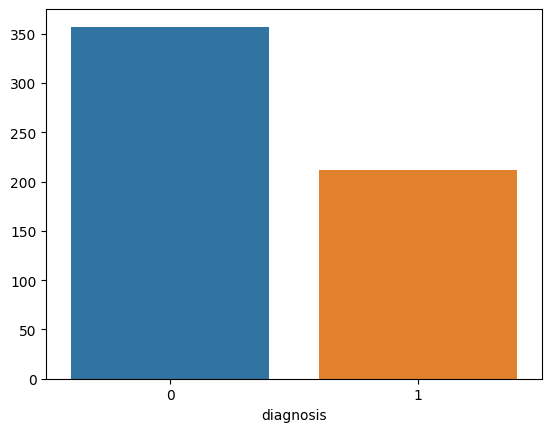

In [11]:
#So it the visual representation of distribution of cancer types
df['diagnosis'].value_counts()
# df.diagnosis.plot.hist()
# sns.countplot(df['diagnosis'])
sns.barplot(x=df['diagnosis'].value_counts().index, y=df['diagnosis'].value_counts().values);

In [12]:
#Find the correlation between the independent variables
corr_matrix=df.corr()
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


In [13]:
# sns.heatmap(corr_matrix)

<Axes: >

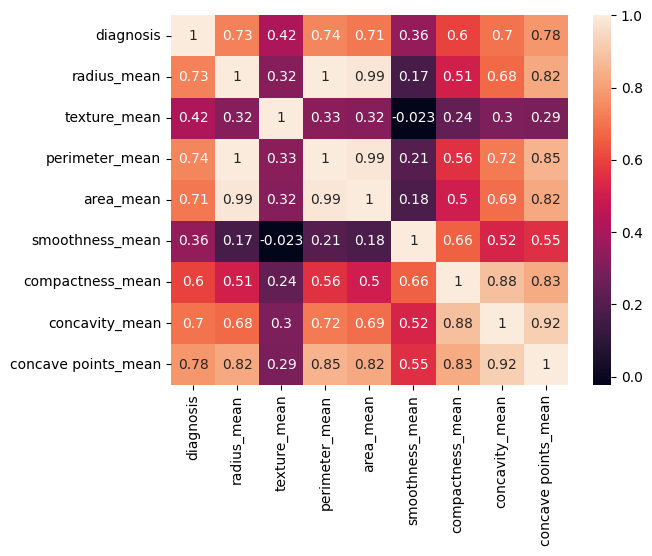

In [14]:
sns.heatmap(df.iloc[:,1:10].corr(),annot=True)

CPU times: total: 3.84 s
Wall time: 6.8 s


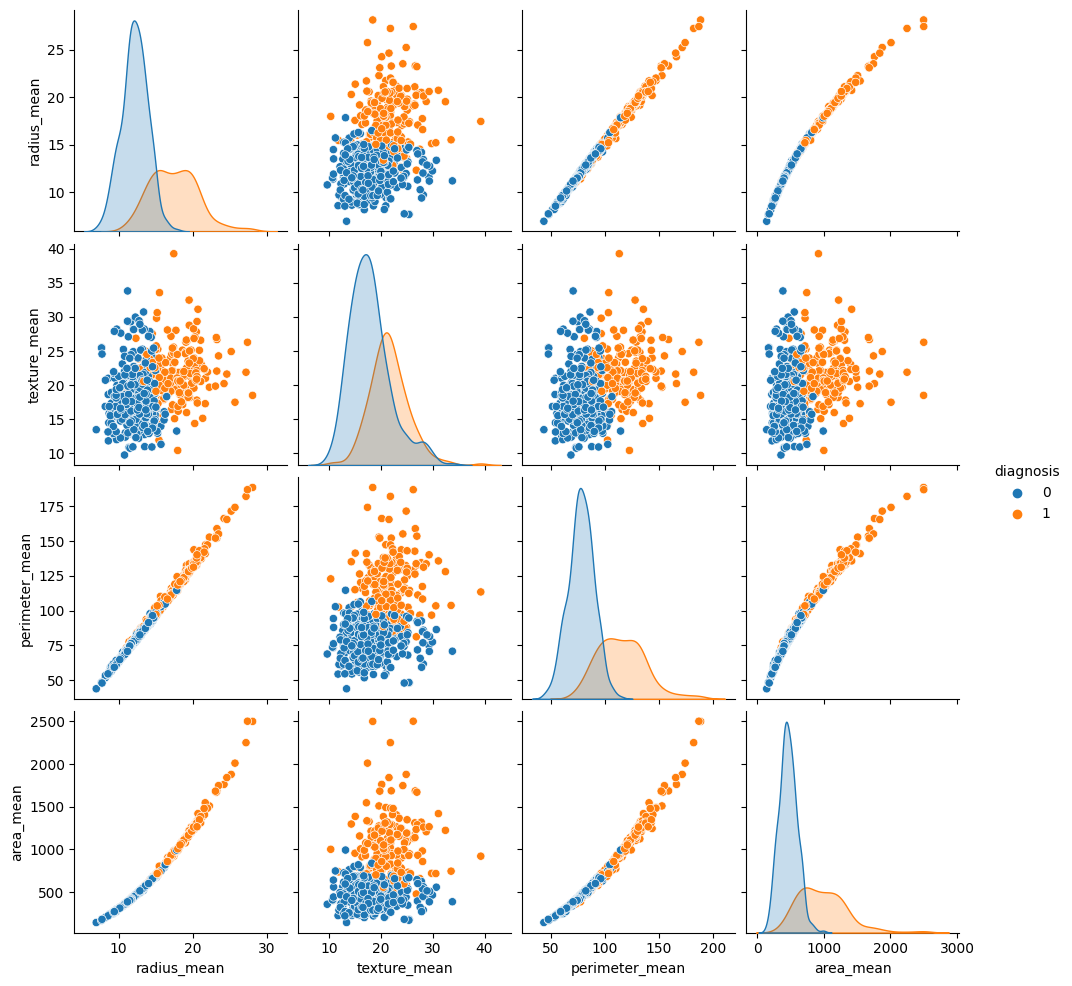

In [15]:
%%time
sns.pairplot(df.iloc[:,1:6],hue='diagnosis')

## 8.Training and Test split

In [33]:
x=df.drop('diagnosis',axis=True)
y=df['diagnosis']

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)
#Feature scalling->Scaling the features makes it easier for algorithms to find the optimal solution, as the different scales of the features do not influence them. It can lead to faster convergence and more accurate predictions, especially when using algorithms like k-nearest neighbors, support vector machines, and neural networks
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform (X_test)

In [35]:
X_test

array([[-0.20052092, -1.35330988, -1.88133895, ..., -0.80379202,
        -0.77099006, -0.2733064 ],
       [ 0.42400655, -0.05687471,  0.37439992, ...,  0.7105408 ,
         0.49311911,  1.98031685],
       [-0.26343909, -0.34353299, -0.79245428, ..., -0.85977025,
        -0.88452266, -1.09527281],
       ...,
       [-0.26979786, -0.52847381, -0.42949272, ..., -0.85977025,
        -1.1488672 , -0.51271995],
       [ 0.43779925,  0.18046601,  0.54378198, ...,  0.1734743 ,
         0.19488424, -0.83234005],
       [-0.26341835, -0.13701573, -0.30581693, ..., -0.53055335,
        -0.38464034, -0.97888285]])

In [188]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
       "DecisionTree":DecisionTreeClassifier(),
       "RandomForest":RandomForestClassifier(),
       "KNN":KNeighborsClassifier(),
       "SVM":SVC(),
       "NaiveBytes":GaussianNB ()}

def fit_and_score(X_train,Y_train,X_test,Y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores

In [189]:
model_scores=fit_and_score(X_train,Y_train,X_test,Y_test)
model_scores

{'Logistic Regression': 0.9824561403508771,
 'DecisionTree': 0.956140350877193,
 'RandomForest': 0.9473684210526315,
 'KNN': 0.9736842105263158,
 'SVM': 0.9649122807017544,
 'NaiveBytes': 0.9298245614035088}

<Axes: >

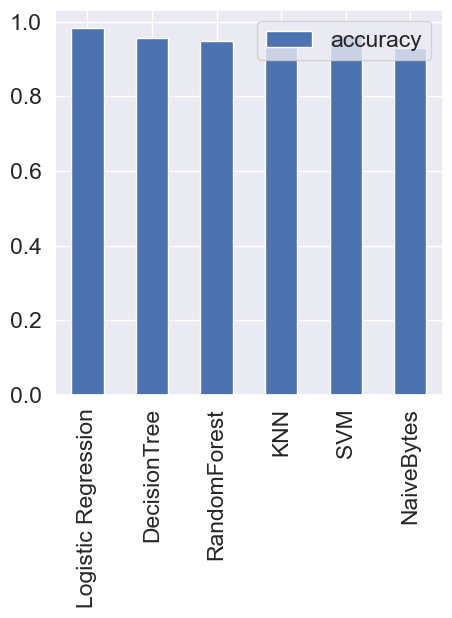

In [190]:
#Model comparison
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar(figsize=(5,5))

## 9.Hyperparameter tuning and cross-validation

### 9.1 Logistic Regression

In [314]:
log_reg_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'penalty': ['l1','l2']}
grid_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid =log_reg_grid,
                       scoring = 'accuracy',
                       cv =10,
                       verbose=True,
                       n_jobs=-1)
grid_log_reg.fit(X_train,Y_train)
print("Logistic Regression Score after tuning",grid_log_reg.score(X_test,Y_test))
print(grid_log_reg.best_params_)

Fitting 10 folds for each of 70 candidates, totalling 700 fits
Logistic Regression Score after tuning 0.9824561403508771
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sushmita\AppData\Roaming\Python\Py

### 9.2 Decision Tree

In [211]:
tree_grid = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
             'max_leaf_nodes': [2,4,6,10,15,30,40,50,100],
             'min_samples_split': [2, 3, 4]}
grid_tree=GridSearchCV(DecisionTreeClassifier(),
                       param_grid =tree_grid,
                       scoring = 'accuracy',
                       cv = 5,
                       verbose=True,
                       n_jobs=-1)
grid_tree.fit(X_train,Y_train)
print("Decision Tree Score after tuning",grid_tree.score(X_test,Y_test))
print(grid_tree.best_params_)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Decision Tree Score after tuning 0.956140350877193
{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_split': 4}


### 9.3 Random Forest

In [219]:
rf_grid = [{'n_estimators': [100,200,300],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [10,25,50,'none'],
            'min_samples_leaf': [1, 2], 
            'min_samples_split': [2, 5]}]
grid_rf=grid_tree=GridSearchCV(RandomForestClassifier(),
                       param_grid =rf_grid,
                       scoring = 'accuracy',
                       cv = 5,
                       verbose=True,
                       n_jobs=-1)
grid_rf.fit(X_train,Y_train)
print("Random Forest Score after tuning",grid_rf.score(X_test,Y_test))
print(grid_rf.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Sushmita\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_par

Random Forest Score after tuning 0.9649122807017544
{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


### 9.4 KNN(K Nearest Neighbours)

In [231]:
knn_grid= [{'n_neighbors': (3,5,7,10,13,15),
            'p': (1,2),
            'weights': ('uniform', 'distance')}]
grid_knn=grid_tree=GridSearchCV(KNeighborsClassifier(),
                       param_grid =knn_grid,
                       scoring = 'accuracy',
                       cv =5,
                       verbose=True,
                       n_jobs=-1)
grid_knn.fit(X_train,Y_train)
print("KNN Model Score after tuning",grid_knn.score(X_test,Y_test))
print(grid_knn.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
KNN Model Score after tuning 0.9736842105263158
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


### 9.5 SVM(Support Vector Machine)

In [315]:
svm_grid=({'C': (0.001, 0.01, 0.1, 1, 10,100,1000),
         'gamma': (.1,.2,.3,.4,.5,.6,.7,.8,.9),
         'kernel': ('linear', 'rbf')})
grid_svm=grid_svm=GridSearchCV(SVC(),
                       param_grid =svm_grid,
                       scoring = 'accuracy',
                       cv =5,
                       verbose=True,
                       n_jobs=-1)
grid_svm.fit(X_train,Y_train)
print("SVM Model Score after tuning",grid_svm.score(X_test,Y_test))
print(grid_svm.best_params_)
print(grid_svm.best_score_)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
SVM Model Score after tuning 0.9824561403508771
{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.9736263736263737


### Summerizing all Models with scores

In [263]:
Actualscores=[]
model_scores
for key, value in model_scores.items():
    Actualscores.append(value)
print(Actualscores)
df_predict={"Name of Model":["Logistic Regression","DecisionTree","RandomForest","KNN","SVM","NaiveBytes"],
           "Actual Score":Actualscores,
           "Best Accuracy after hyperparameter tuning":[grid_log_reg.score(X_test,Y_test),grid_tree.score(X_test,Y_test),
                                                        grid_rf.score(X_test,Y_test),grid_knn.score(X_test,Y_test),
                                                       grid_svm.score(X_test,Y_test),None]}
df_predicted=pd.DataFrame(df_predict)
df_predicted

[0.9824561403508771, 0.956140350877193, 0.9473684210526315, 0.9736842105263158, 0.9649122807017544, 0.9298245614035088]


,Name of Model,Actual Score,Best Accuracy after hyperparameter tuning
0,Logistic Regression,0.982456,0.982456
1,DecisionTree,0.956140,0.973684
2,RandomForest,0.947368,0.947368
3,KNN,0.973684,0.973684
4,SVM,0.964912,0.982456
5,NaiveBytes,0.929825,NaN


In [273]:
y_preds=grid_log_reg.predict(X_test)
y_preds

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0])

In [275]:
Y_test

21     0
7      1
69     0
397    0
243    0
      ..
542    0
390    0
96     0
86     1
93     0
Name: diagnosis, Length: 114, dtype: int32

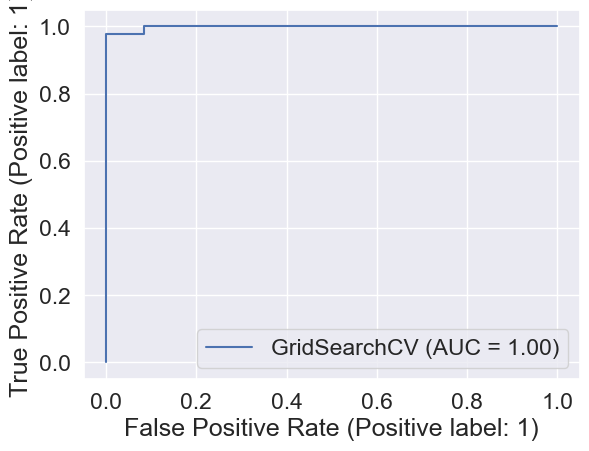

In [295]:
#Plot ROC Curve and calculate AUC Metric
RocCurveDisplay.from_estimator(grid_log_reg,X_test,Y_test)

In [296]:
print(confusion_matrix(y_preds,Y_test))

[[70  1]
 [ 1 42]]


In [310]:
sns.set(font_scale=1.5)
def conf_matrix(y_preds,Y_test):
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_preds,Y_test),
                  annot=True,
                  cbar=False)
    plt.xlabel("True Actual Values")
    plt.ylabel("Predicted Values")

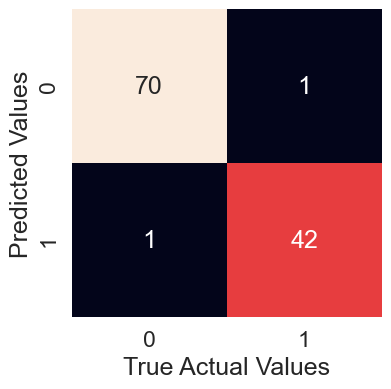

In [311]:
conf_matrix(y_preds,Y_test)

In [312]:
print(classification_report(y_preds,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Conclusion

#### To conclude this notebook, it is fairly evident that it is the Logistic Regression model that has come out triumphant with the highest accuracies both before and after the hyper-parameter tuning. It ended up with an accuracy of for 0.982456(98.24%) hyper-parameter tuning and 0.982456(98.24%) after and is hence, the best suited model out of the rest for the given dataset.